In [2]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from threading import Timer
#from Quarto import *
#from keras_sequential_ascii import sequential_model_to_ascii_printout

In [2]:
r = requests.get('http://srv.lucatoma.eu/valsdav/output/losses.txt')

Epochs: 417900
Selected: 417800
1) Mean: 4598.91302381
Std: 2046.80208641


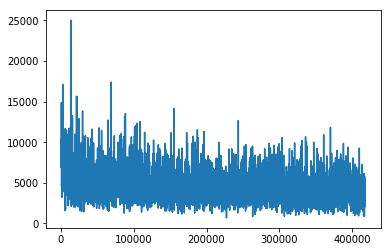

[ 7067.15087891  3203.97314453  2191.86132812  3941.26416016  2841.81396484
  2048.10864258  7259.49414062  2966.63720703  3950.57397461  6563.57763672
  5547.79394531  2525.5378418   4774.01953125  3132.14404297  4066.84912109
  4903.24511719  4073.86206055  1562.79003906  2222.98388672  3111.53613281
  2310.04418945  3450.52148438  1645.17993164  3771.44677734  3959.34790039
  4220.765625     958.8112793   3710.61303711  3305.17700195  5595.36132812
  3876.75146484  5076.890625    3374.73681641  2385.1875      2270.09521484
  3157.44287109  6137.8125       862.86743164  3640.00976562  5795.28320312
  4432.17089844  5557.75927734  4123.45507812  4024.57543945  3305.95996094
  2177.94091797  2052.53759766  3176.77758789  2231.99731445  4973.71484375]


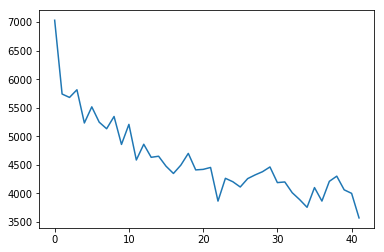

In [3]:
i = 100
data = np.array([float(x) for x in r.text.split("\n")[500:]])
print("Epochs: {}".format(len(data)*100))
print("Selected: {}".format((len(data)*100 - i)))
data1 = data[int(i*0.01)-1:]
index = list(range(i, (len(data)+1)*100,100))
plt.plot(index, data1)
print("1) Mean:",np.mean(data1))
print("Std:",np.std(data1))

plt.show()
print(data1[-50:])

interval = 100
m = []
for i in range(0, len(data1), interval):
    m.append(np.mean(data1[i:i+interval]))

plt.plot(range(len(m)),m)
plt.show()

Epochs: 90
Selected: 80
1) Mean: 11174.5622287
Std: 3684.15651065


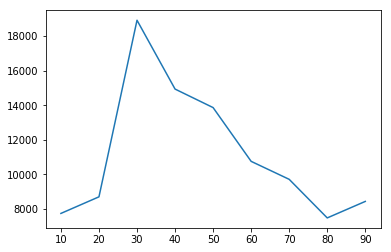

[  7752.05029297   8709.51757812  18903.7949219   14930.5         13861.1035156
  10757.4335938    9719.44628906   7492.27636719   8444.9375    ]


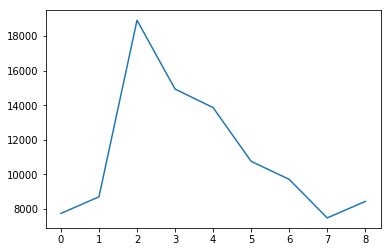

In [4]:
#r = requests.get('http://srv.lucatoma.eu/valsdav/output-v3/losses.txt')
with open("output/losses.txt") as file:
    text = file.read()
i = 10
data = np.array([float(x) for x in text.split("\n")])
print("Epochs: {}".format(len(data)*10))
print("Selected: {}".format((len(data)*10 - i)))
data1 = data[int(i*0.1)-1:]
index = list(range(i, (len(data)+1)*10,10))
plt.plot(index, data1)
print("1) Mean:",np.mean(data1))
print("Std:",np.std(data1))

plt.show()
print(data1[-50:])

interval = 1
m = []
for i in range(0, len(data1), interval):
    m.append(np.mean(data1[i:i+interval]))

plt.plot(range(len(m)),m)
plt.show()

In [ ]:
r = requests.get('http://srv.lucatoma.eu/valsdav/output-v3/losses.txt')
#with open("output/losses.txt") as file:
#    text = file.read()
text = r.text
i = 10
data = np.array([float(x) for x in text.split("\n")])
print("Epochs: {}".format(len(data)*10))
print("Selected: {}".format((len(data)*10 - i)))
data1 = data[int(i*0.1)-1:]
index = list(range(i, (len(data)+1)*10,10))
plt.plot(index, data1)
print("1) Mean:",np.mean(data1))
print("Std:",np.std(data1))

plt.show()
print(data1[-50:])

interval = 10
m = []
for i in range(0, len(data1), interval):
    m.append(np.mean(data1[i:i+interval]))

plt.plot(range(len(m)),m)
plt.show()

In [6]:
with open("output/losses_details.txt") as file:
    text = file.read()
   
#s = requests.get('http://srv.lucatoma.eu/valsdav/output-v3/losses_details.txt')
#text = s.text
losses = []
pieces = []
rewards = []
data = np.array([x.split(" ") for x in text.split("\n")])
for d in data[:-1]:
    losses.append(float(d[0]))
    rewards.append(int(d[1]))
    pieces.append(int(d[2]))
    

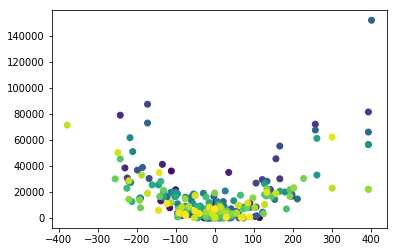

288


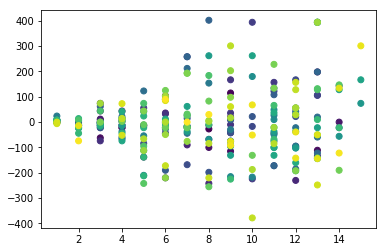

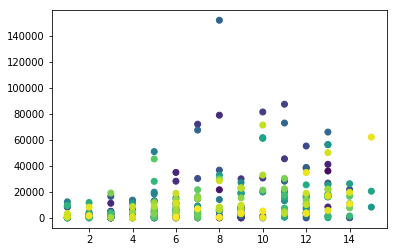

In [7]:
plt.scatter(rewards, losses, c=range(len(losses)))
plt.show()
print(len(rewards))

plt.scatter(pieces,rewards,c=range(len(losses)))
plt.show()

plt.scatter(pieces, losses,c=range(len(losses)))
plt.show()

In [8]:
plt.scatter(rewards[-3200:], losses[-3200:], c=range(3200))
plt.show()

plt.scatter(pieces[-3200:],rewards[-3200:],  c=range(3200))
plt.show()

plt.scatter(pieces[-3200:], losses[-3200:], c=range(3200))
plt.show()

ValueError: Invalid RGBA argument: 0

## Network visualization

In [10]:
from keras import initializers
from keras.initializers import normal, identity
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD , Adam
LEARNING_RATE = 1e-4

def build_model():
    print("Now we build the model")
    model = Sequential()
    model.add(Conv2D(32, (2,3), strides=(1, 1), input_shape=(4,16,4), name="conv1"))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (2,3), strides=(1, 1), name="conv2"))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(512, name="dense"))
    model.add(Activation('relu'))
    model.add(Dense(1, name="output"))
        
    adam = Adam(lr=LEARNING_RATE)
    model.compile(loss='mse',optimizer=adam)
    #plot_model(model,show_shapes=True, to_file='model.png')
    print("We finish building the model")
    return model



In [13]:
model = build_model()
model.load_weights("model.h5")
adam = Adam(lr=LEARNING_RATE)
model.compile(loss='mse',optimizer=adam)
print("Weights loaded!")

Now we build the model
We finish building the model
Weights loaded!


In [14]:
sequential_model_to_ascii_printout(model)
layers = model.layers

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      4   16    4
              Conv2D    \|/  -------------------       800     0.1%
                relu   #####      3   14   32
              Conv2D    \|/  -------------------     12352     1.5%
                relu   #####      2   12   64
             Flatten   ||||| -------------------         0     0.0%
                       #####        1536
               Dense   XXXXX -------------------    786944    98.3%
                relu   #####         512
               Dense   XXXXX -------------------       513     0.1%
                       #####           1


Gameboard


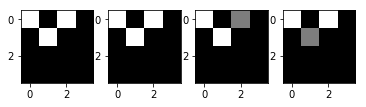

Spaces:  [(0, 1), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Item D, LeftItems: EFGHIJKLMNOP
Left items image


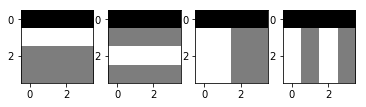

In [17]:
from Quarto import *
g = Gameboard()
g.apply_moves([((0,0),"A"), ((1,1),"B"),((0,2),"C")])
left = [l for l in"EFGHIJKLMNOP"]
s = Status(g, "D", left, left_items_image(left))
s.show()

In [21]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations



img = visualize_activation(model,3 , filter_indices=24, seed_input=actimg,verbose=True, tv_weight=0 , lp_norm_weight=0)



Iteration: 1, named_losses: <zip object at 0x7fe34b556dc8>, overall loss: -22.497243881225586
Iteration: 2, named_losses: <zip object at 0x7fe34b556f48>, overall loss: -29.042510986328125
Iteration: 3, named_losses: <zip object at 0x7fe34b556f88>, overall loss: -33.630126953125
Iteration: 4, named_losses: <zip object at 0x7fe34b556688>, overall loss: -37.23215103149414
Iteration: 5, named_losses: <zip object at 0x7fe34b556d88>, overall loss: -40.444271087646484
Iteration: 6, named_losses: <zip object at 0x7fe34b556688>, overall loss: -43.596954345703125
Iteration: 7, named_losses: <zip object at 0x7fe34b556fc8>, overall loss: -46.37220764160156
Iteration: 8, named_losses: <zip object at 0x7fe34b561108>, overall loss: -48.94406509399414
Iteration: 9, named_losses: <zip object at 0x7fe34b561148>, overall loss: -51.38579177856445
Iteration: 10, named_losses: <zip object at 0x7fe34b561188>, overall loss: -53.7602653503418
Iteration: 11, named_losses: <zip object at 0x7fe34b5611c8>, overall

Iteration: 91, named_losses: <zip object at 0x7fe34b561cc8>, overall loss: -181.46690368652344
Iteration: 92, named_losses: <zip object at 0x7fe3740b7888>, overall loss: -182.8280792236328
Iteration: 93, named_losses: <zip object at 0x7fe34b556ec8>, overall loss: -184.2147979736328
Iteration: 94, named_losses: <zip object at 0x7fe34b5569c8>, overall loss: -185.60032653808594
Iteration: 95, named_losses: <zip object at 0x7fe3740b7888>, overall loss: -186.9736328125
Iteration: 96, named_losses: <zip object at 0x7fe34b556ec8>, overall loss: -188.3900146484375
Iteration: 97, named_losses: <zip object at 0x7fe34b5569c8>, overall loss: -189.7748565673828
Iteration: 98, named_losses: <zip object at 0x7fe3740b7888>, overall loss: -191.1836395263672
Iteration: 99, named_losses: <zip object at 0x7fe34b556ec8>, overall loss: -192.56358337402344
Iteration: 100, named_losses: <zip object at 0x7fe34b5569c8>, overall loss: -193.9563751220703
Iteration: 101, named_losses: <zip object at 0x7fe3740b7888

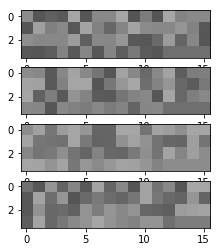

In [22]:
show_action_image(img)

In [2]:
from Quarto import *


Using TensorFlow backend.


In [23]:
replay_memory = Experience(10, 4, 0.5)

In [24]:
replay_memory.add((1),20)
replay_memory.add((2),100)
replay_memory.add((3),30)
replay_memory.add((4),3000)
replay_memory.add((5),1000)

In [25]:
replay_memory.select(0.4)

([5, 4, 2, 3],
 array([ 0.49593442,  0.39810717,  0.78600309,  1.        ]),
 [4, 3, 1, 2])

In [26]:
replay_memory.tree.print_tree()

22.99900223131502 
22.99900223131502 0 
17.37558897941153 5.623413251903491 0 0 
7.63441361516796 9.74117536424357 5.623413251903491 0 0 0 0 0 
4.47213595499958 3.1622776601683795 2.340347319320716 7.400828044922853 5.623413251903491 0 0 0 0 0 0 0 0 0 0 0 
